This notebook is meant to look at what data is being observed in ZUDS and download the data. I was planning to download this to snova. There are a few issues still with what I want to do, and will fix later.

In [22]:
# Note that this requires ZTFOPS login and password. I think this has changed. Go to the ZTF wiki
# http://www.oir.caltech.edu/twiki_ptf/bin/view/ZTF/ZTFOps?twiki_redirect_cache=0bfb11b4e399ba4e2bc9ee2bf80c4377
# and login to obtain your username and password. I believe this has been reset recently.

from ztfquery import query
zuds_0 = query.NightSummary('20200107')
# The information on science exposures is in a pandas dataframe `zuds_0.data`. To get all exposures,
# e.g. including calibration exposures use `zuds_0.data_all`.

In [2]:
# exposure proposals are identified by `qcomment` (partnership vs msip is identified by `pid` but this can 
# include multiple parntership programs)
zuds_0.data.qcomment.unique()

array(['ToO_LVC_2020-01-05-16:24:', 'all_sky', 'TESS_S20',
       'reference_building_g_0', 'reference_building_g_1',
       'Caltech_RRLyr', 'reference_building_r_0',
       'reference_building_r_1', 'reference_building_r_1_Ca',
       'Caltech_1DC', 'ZUDS', 'reference_building_i', 'missing_FCD',
       'Partnership_Twilight_Wint'], dtype=object)

In [23]:
# These are our fields.
zuds_0.data.query('qcomment == "ZUDS"')

,UT_START,sun,exp,fid,type,field,pid,ra,dec,slew,wait,fileroot,progpi,qcomment
273,2020-01-07T08:21:55.8,-77,30,2,targ,819,2,180.0000,62.1500,6.22,12.4,ztf_20200107348414_000819_zr,Kulkarni,ZUDS
274,2020-01-07T08:22:38.2,-77,30,2,targ,820,2,193.3333,62.1500,7.36,9.1,ztf_20200107348993_000820_zr,Kulkarni,ZUDS
275,2020-01-07T08:23:17.3,-77,30,2,targ,844,2,197.1429,69.3500,8.71,14.2,ztf_20200107349491_000844_zr,Kulkarni,ZUDS
276,2020-01-07T08:24:01.5,-77,30,2,targ,861,2,180.0000,76.5500,7.20,8.9,ztf_20200107349942_000861_zr,Kulkarni,ZUDS
277,2020-01-07T08:24:40.4,-77,30,2,targ,843,2,180.0000,69.3500,20.44,20.1,ztf_20200107350451_000843_zr,Kulkarni,ZUDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,2020-01-07T13:13:00.4,-20,30,2,targ,791,2,202.4011,54.9500,7.53,8.8,ztf_20200107550683_000791_zr,Kulkarni,ZUDS
689,2020-01-07T13:14:57.5,-20,30,2,targ,756,2,194.9498,47.7500,7.45,8.8,ztf_20200107552026_000756_zr,Kulkarni,ZUDS
690,2020-01-07T13:15:36.3,-20,30,2,targ,716,2,192.2500,40.5500,7.45,8.9,ztf_20200107552488_000716_zr,Kulkarni,ZUDS
693,2020-01-07T13:17:36.0,-19,30,2,targ,790,2,191.3900,54.9500,14.63,11.6,ztf_20200107553843_000790_zr,Kulkarni,ZUDS


In [10]:
# This shows all fields observed (I want to change this to ZUDS ...)
fig = zuds_0.show_gri_fields()

In [11]:
%matplotlib inline

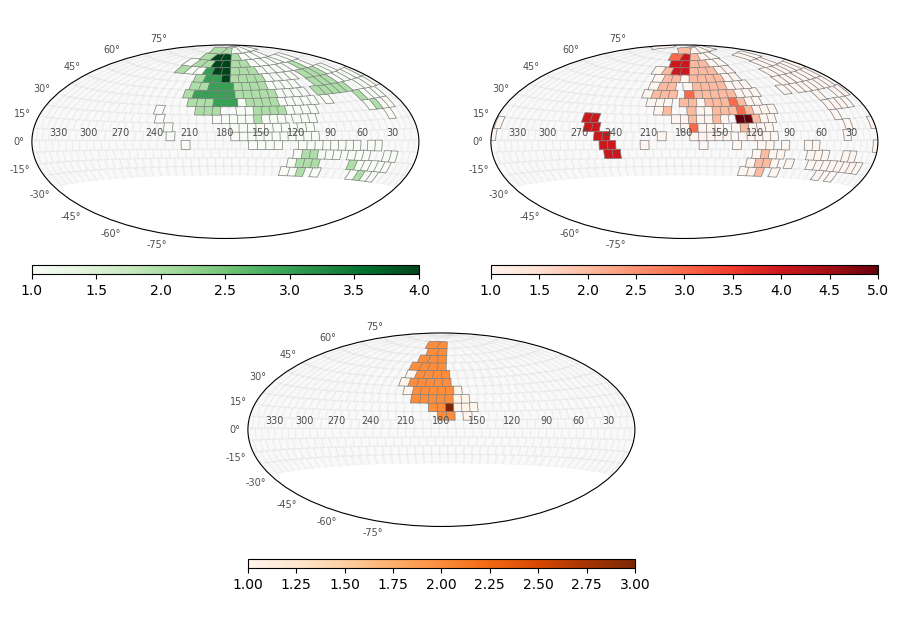

In [12]:
fig

# Attempt to display and download only zuds data

In [20]:
mask = ((zuds_0.data['qcomment'] == 'ZUDS') * (zuds_0.data['field'] == 300))

/Users/rbiswas/soft/mypython3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [24]:
zuds_0.download_data(mask=mask, show_progress=True, notebook=True)

TypeError: get_data_path() got an unexpected keyword argument 'indexes'